<a href="https://colab.research.google.com/github/crinex/what-is-linear_regression/blob/main/Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 선형회귀

### Data Collection

In [3]:
from keras.utils import get_file

import numpy as np
import pandas as pd

In [2]:
fname = 'momjjangban_data.csv'
origin = 'https://skettee.github.io/post/linear_regression/momjjangban_data.csv'
path = get_file(fname, origin)

8192/813 [==============================================================================================================================================================================================================================================================================================================] - 0s 0us/step


In [5]:
df = pd.read_csv(path, index_col=0)
df.head()

,height,weight
0,158.9,52.015
1,173.6,66.910
2,174.4,66.000
3,169.2,NaN
4,154.0,49.275


###Data Cleansing

In [9]:
print(df.isnull().sum())
print(df.isna().sum())

height    1
weight    1
dtype: int64
height    1
weight    1
dtype: int64


In [10]:
df.shape

(52, 2)

In [13]:
# axis=0 : 결측값있는 행 제거
# axis=1 : 결측값있는 열 제거
# reset_index : 행 인덱스 초기화
# drop=True : 기존 인덱스를 삭제후 재배열
# inplace=True : 새로운 변수에 재생성하지 않고 바로 재배열
df = df.dropna(axis=0).reset_index(drop=True)
df.shape

(50, 2)

In [14]:
height_data = df.height
weight_data = df.weight
print(height_data.shape)
print(weight_data.shape)

(50,)
(50,)


### Data Analysis

In [15]:
import matplotlib.pyplot as plt

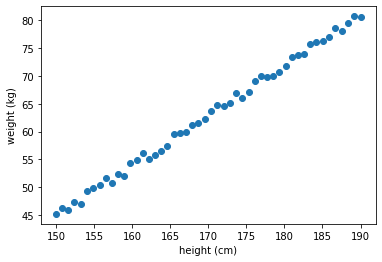

In [16]:
plt.scatter(height_data, weight_data)
plt.xlabel('height (cm)')
plt.ylabel('weight (kg)')
plt.show()

### Data Transformation
- 행의 크기 : 데이터의 개수
- 열의 크기 : 측정 항목의 개수
- 키 값을 입력했을때 몸짱반에 들어갈 수 있는 몸무게를 알고 싶은것이니 키 데이터를 입력 데이터 x, 몸무게 데이터를 출력 데이터 y라 한다.

In [18]:
x = np.array(height_data).reshape(len(height_data), 1)
y = np.array(weight_data).reshape(len(weight_data), 1)

print('x =', x[:10])
print('x.shape =', x.shape)
print('y =', y[:10])
print('y.shape = ', y.shape)

x = [[158.9]
 [173.6]
 [174.4]
 [154. ]
 [177.7]
 [188.3]
 [183.4]
 [168.7]
 [185.1]
 [156.5]]
x.shape = (50, 1)
y = [[52.015]
 [66.91 ]
 [66.   ]
 [49.275]
 [69.82 ]
 [79.479]
 [75.685]
 [61.569]
 [76.346]
 [51.694]]
y.shape =  (50, 1)


### Linear Regression Modeling
- 모델을 y = wx + b인 선형식으로 놓고 주어진 데이터에 가장 비슷한 직선을 표현하는 w와 b를 찾는것이다.
- w, b를 가중치와 편향이라 하고 모델의 파라미터라 부른다.

### Loss Function
- 선형 모델에 x값을 넣어 출력한 y값과 실제 y값과의 차이를 오차라하고 그 값의 제곱을 한 값인 제곱오차의 평균을 손실함수로 사용한다.
- 그러면 우리는 손실함수가 최솟값을 갖을때를 찾으면 된다. 그 순간이 오차가 가장 적은 순간일 것이다. 그러기 위해 경사하강법이라는 방법을 사용한다.
- 경사하강법은 함수 값이 작아지는 방향으로 독립 변수 값들을 움직이면서 변화율을 관찰한다.

### 정리
1. y(예측값) = wx + b 함수 정의
2. 손실함수 정의(MSE)
3. 손실함수의 최소값을 찾는 방법 선택(GD). 최소값을 찾는 방법을 옵티마이저라고 부른다.
4. 반복할 횟수 지정(epoch)
5. 주어진 조건으로 모델을 최적화(fit)

### 정규화(Normalization)
- 데이터를 0~1사이로 만들어준다.
- 정규값 = (현재값 - 최소값) / (최댓값 - 최소값)

In [19]:
from sklearn import preprocessing

In [20]:
sc = preprocessing.MinMaxScaler()
X_train = sc.fit_transform(x)
y_train = sc.transform(y)

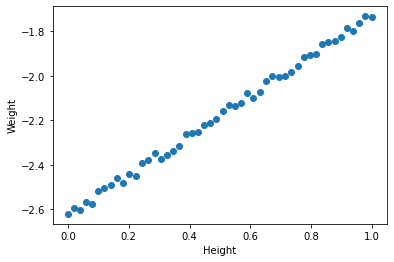

In [21]:
plt.scatter(X_train, y_train)
plt.xlabel('Height')
plt.ylabel('Weight')
plt.show()

## Modeling

In [22]:
from keras import Sequential
from keras.layers import Dense

In [35]:
# 모델 준비
model = Sequential()

# 입력변수 개수 1개, 출력변수 개수 1개인 선형모델 생성
model.add(Dense(1, input_dim=1))

# Loss function, Optimizer 선택
model.compile(
    loss='mean_squared_error',
    optimizer='sgd',
    metrics=['accuracy']
)

# epoch만큼 반복해서 손실값을 최소가 되도록 모델 훈련
hist = model.fit(X_train, y_train, epochs=3000, verbose=0)

### 손실값의 변화 그래프로 확인

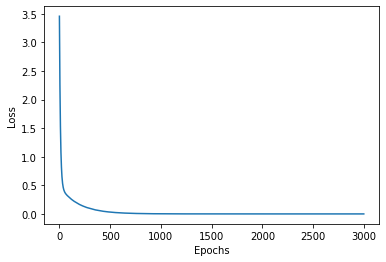

In [24]:
plt.plot(hist.history['loss'])
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

### w, b 값 확인

In [28]:
w, b = model.get_weights()
w = w[0][0]
b = b[0]
print('가중치 :', w)
print('편향 :', b)

가중치 : 0.8989577
편향 : -2.6254747


### 그래프로 확인

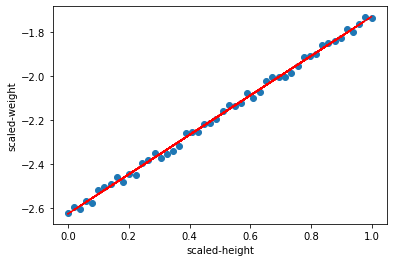

In [31]:
x_scale = sc.transform(x)
y_scale = sc.transform(y)
plt.scatter(x_scale, y_scale)
plt.plot(x_scale, w*x_scale+b, 'r--')
plt.xlabel('scaled-height')
plt.ylabel('scaled-weight')
plt.show()

### 예측해보기

In [36]:
input_data = 178.5

# reshape(-1, 1) : 1개의 열로 재배열
input_x = sc.transform(np.array([input_data]).reshape(-1,1))
predict = model.predict(input_x)
predict = sc.inverse_transform(predict)

print('몸짱반에 들어갈 수 있는 몸무게는 {:.2f} kg 입니다.'.format(predict[0][0]))

몸짱반에 들어갈 수 있는 몸무게는 70.60 kg 입니다.
